In [1]:
from helpers import *

In [2]:
df = pd.read_csv("full_data_half.csv")
print(df.shape)
df.head()

(48048, 80)


,customer_unique_id,avg_delivery_delay,items_nb,avg_satisfaction,cat_agro_industry_and_commerce,cat_air_conditioning,cat_art,cat_arts_and_craftmanship,cat_audio,cat_auto,...,cat_stationery,cat_tablets_printing_image,cat_telephony,cat_toys,cat_undefined,cat_watches_gifts,recency_score,frequency_score,monetary_score,rfm_score
0,f00aa1cfc257dfff20184269b19db923,29.5,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,5,4,454
1,43c73f9043398f0dd2163fc5f825e61a,8.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,5,5,255
2,251e658613a224723f8a077946183b20,6.0,2.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,5,5,255
3,2b5ffb4c42d26e466ad575ecce365aa2,6.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,5,4,454
4,574e36a816bf7a295404e686062fc0de,3.5,3.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,5,5,455


In [3]:
df = normalize_dataframe(df.drop(columns=["customer_unique_id"], axis=1))

## TSNE PCA

Projecting 79-dimensional data to 2D


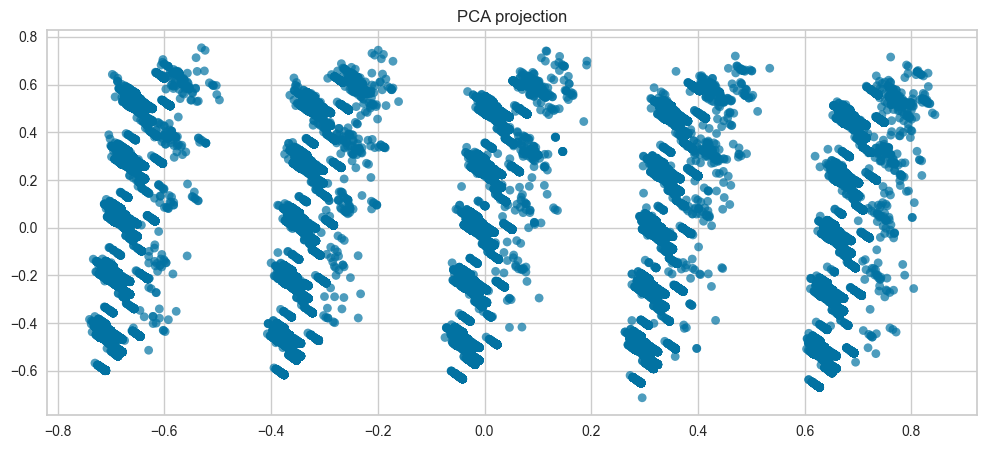

In [4]:
pca = PCA(n_components=2)
X = df
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], 
            edgecolor='none', alpha=0.7, s=40)
plt.title('PCA projection')
plt.show()

In [5]:
df

,avg_delivery_delay,items_nb,avg_satisfaction,cat_agro_industry_and_commerce,cat_air_conditioning,cat_art,cat_arts_and_craftmanship,cat_audio,cat_auto,cat_baby,...,cat_stationery,cat_tablets_printing_image,cat_telephony,cat_toys,cat_undefined,cat_watches_gifts,recency_score,frequency_score,monetary_score,rfm_score
0,0.158854,0.083333,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.75,0.772523
1,0.046875,0.083333,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,1.0,1.00,0.324324
2,0.036458,0.083333,0.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,1.0,1.00,0.324324
3,0.036458,0.083333,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.75,0.772523
4,0.023437,0.125000,0.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.75,1.0,1.00,0.774775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,0.036458,0.041667,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.50,0.680180
48044,0.036458,0.125000,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.75,0.457207
48045,0.088542,0.041667,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.50,0.454955
48046,0.026042,0.041667,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.25,0.903153


In [6]:
tsne = TSNE(random_state=42)
X_tsne_pca = tsne.fit_transform(X_reduced)

Text(0.5, 1.0, 'TSNE with PCA')

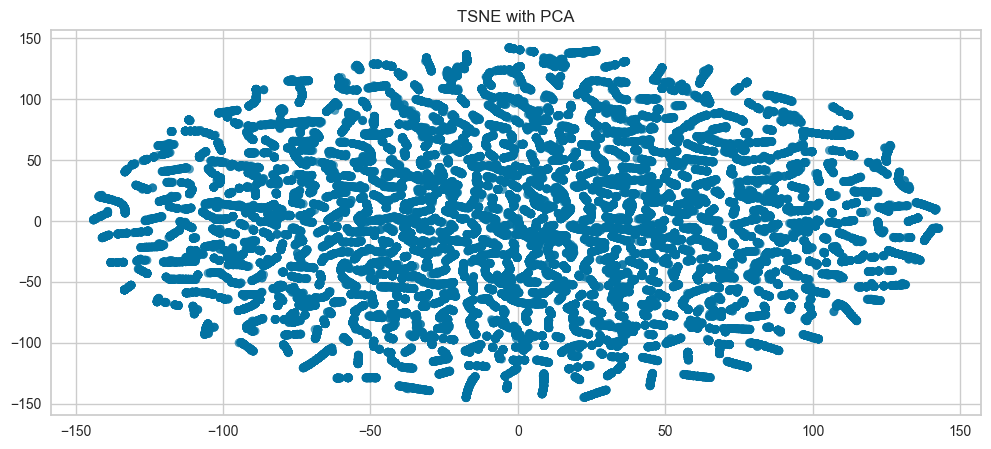

In [7]:
plt.figure(figsize=(12,5))
plt.scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1],
            edgecolor='none', alpha=0.7, s=40)
plt.title('TSNE with PCA')

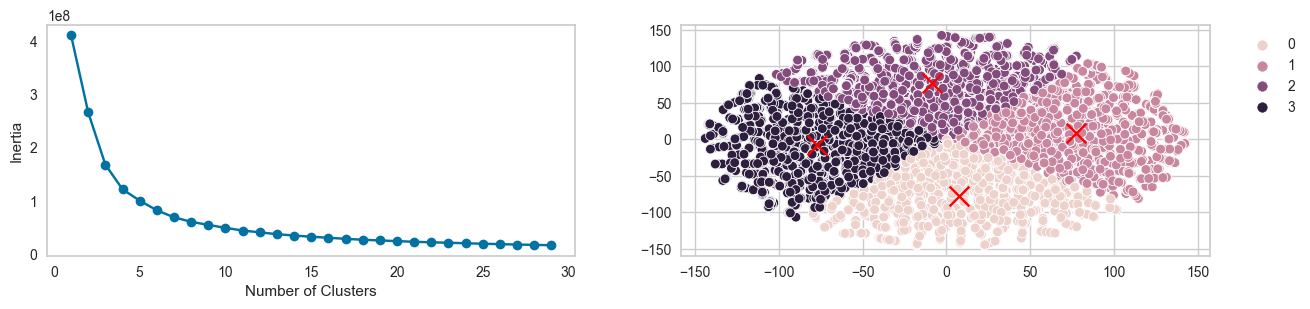

<Figure size 1000x300 with 0 Axes>

In [8]:
config_kmeans_range=30
show_segmentation(X_tsne_pca, 4)

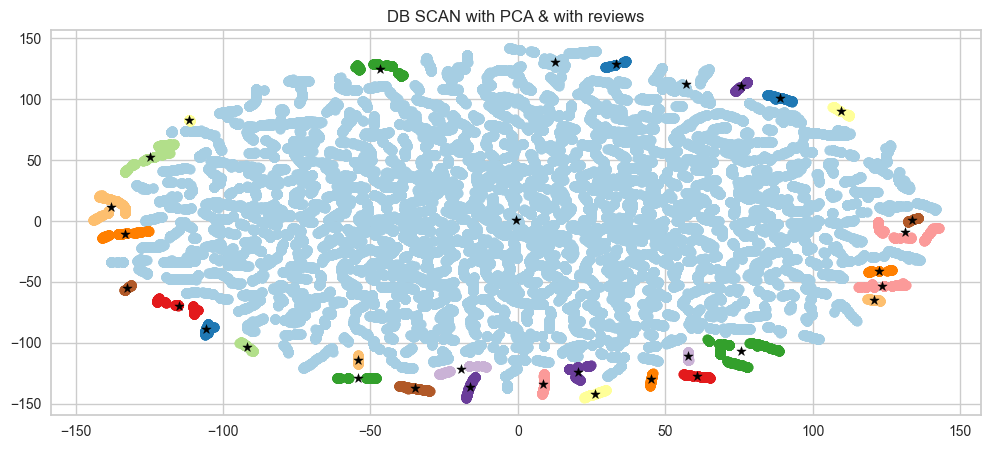

n_clusters 33


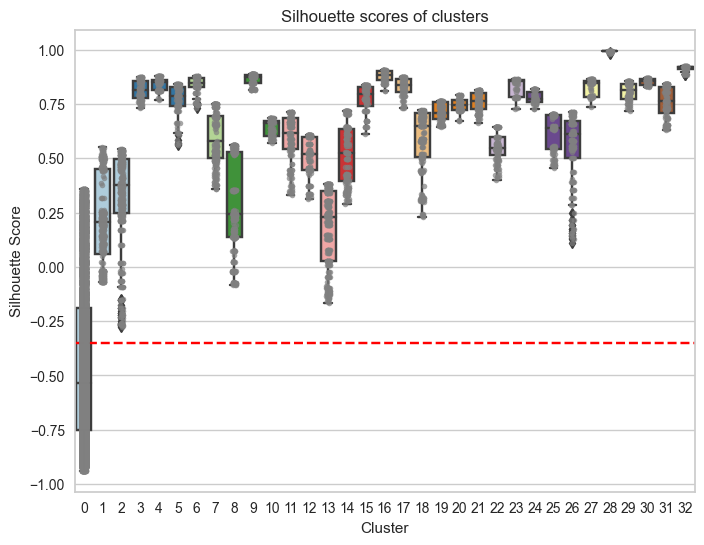

In [9]:
do_dbscan(X_tsne_pca, "DB SCAN with PCA & with reviews", eps=8, min_samples=8)

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


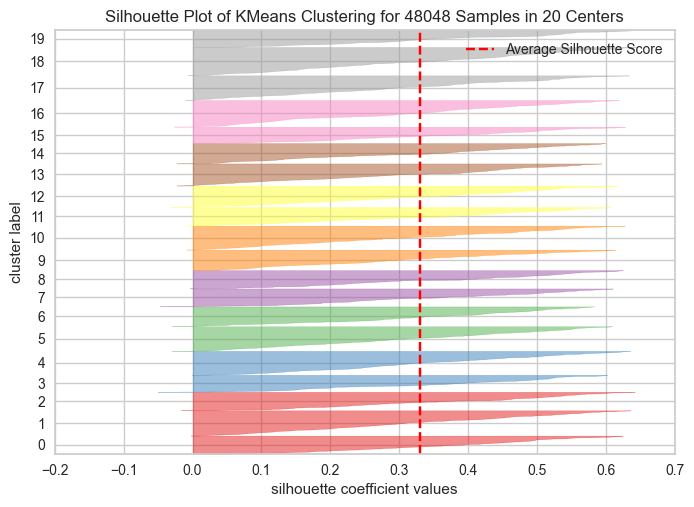

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 48048 Samples in 20 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [10]:
# Instantiate the clustering model and visualizer 
model = KMeans(20)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_tsne_pca)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

#### PCA Explainability (without review)

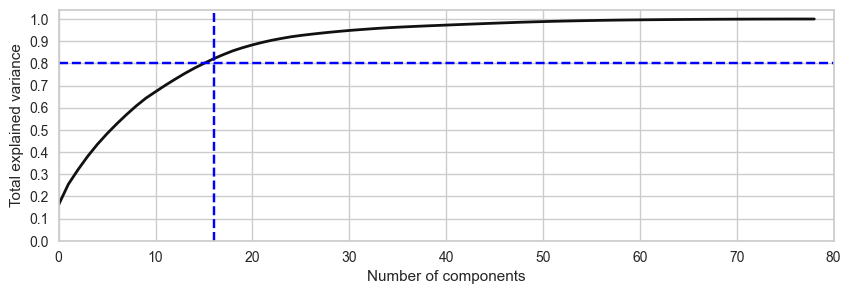

16


In [11]:
pca = PCA().fit(df)

plt.figure(figsize=(10,3))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 80)
plt.yticks(np.arange(0, 1.1, 0.1))

x_value = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.8)[0][0]  

# Add vertical lines  
plt.axvline(x_value, color='blue', linestyle='--')  
plt.axhline(0.8, color='blue', linestyle='--')  

plt.show()
print(x_value)

In [12]:
# perform PCA on the data
pca = PCA(n_components=1)  
pca.fit(df)  
  
# get the loadings for the first principal component  
loadings = pca.components_[0]  
  
# create a dataframe to display the loadings  
loadings_df = pd.DataFrame({'Feature': df.columns, 'Loading': loadings})  
loadings_df = loadings_df.sort_values('Loading', ascending=False)  
  
print(loadings_df)  

                Feature   Loading
75        recency_score  0.737460
78            rfm_score  0.666716
77       monetary_score  0.050324
46    cat_health_beauty  0.050235
74    cat_watches_gifts  0.039002
..                  ...       ...
71        cat_telephony -0.014377
45     cat_garden_tools -0.017776
42  cat_furniture_decor -0.020865
72             cat_toys -0.025193
23       cat_cool_stuff -0.030625

[79 rows x 2 columns]


In [13]:
explained_variance = pca.explained_variance_ratio_[0] # explained variance of the first principal component  
feature_contrib = loadings_df['Loading'].apply(lambda x: x**2)  
loadings_df["Contribution"] = round(feature_contrib / feature_contrib.sum() * explained_variance,5) 

In [14]:
loadings_df

,Feature,Loading,Contribution
75,recency_score,0.737460,0.08834
78,rfm_score,0.666716,0.07220
77,monetary_score,0.050324,0.00041
46,cat_health_beauty,0.050235,0.00041
74,cat_watches_gifts,0.039002,0.00025
...,...,...,...
71,cat_telephony,-0.014377,0.00003
45,cat_garden_tools,-0.017776,0.00005
42,cat_furniture_decor,-0.020865,0.00007
72,cat_toys,-0.025193,0.00010
